In [ ]:
!pip install librosa --upgrade


# basic subspace filtering using SVD for noise reduction

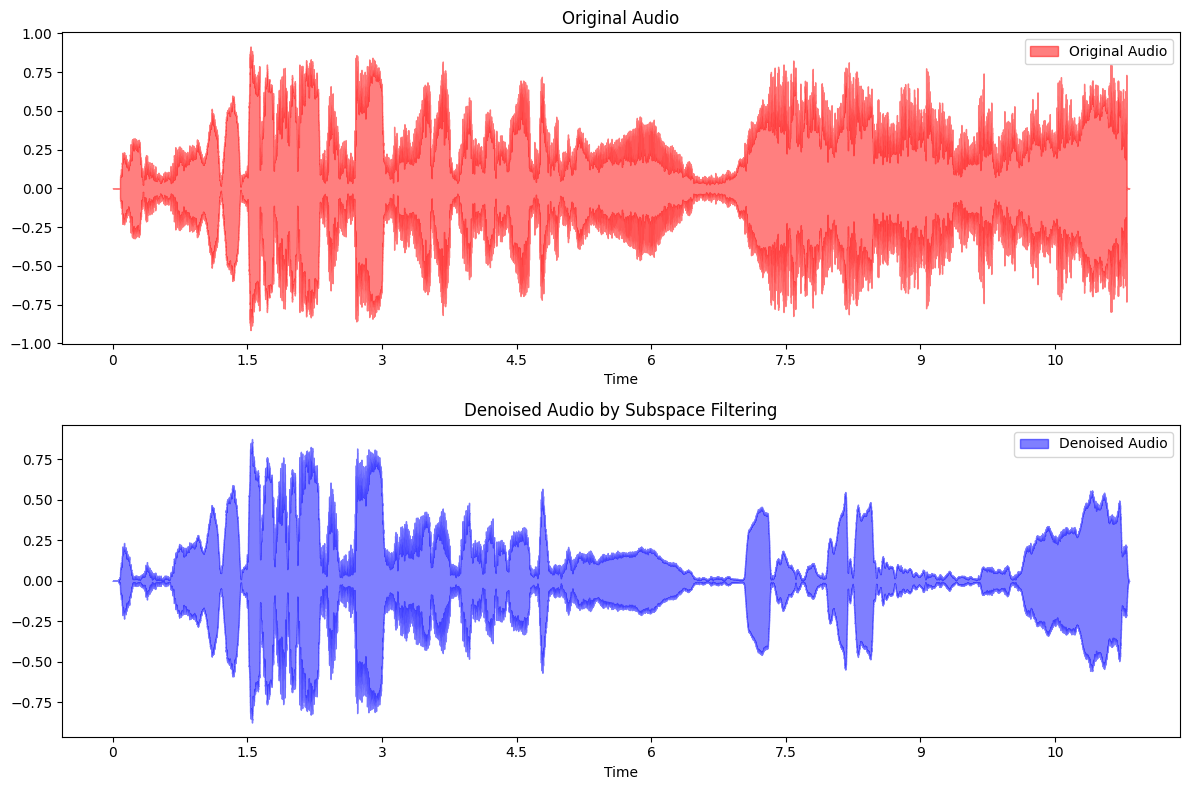

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Load an audio file
audio, sr = librosa.load('/content/original.mpeg', sr=None)

# Obtain the Short-Time Fourier Transform of the audio
X = librosa.stft(audio)

# Perform Singular Value Decomposition
U, s, Vh = np.linalg.svd(X, full_matrices=False)

# Reconstruct the signal using only the first k components
k = 5  # Number of components to retain
S = np.diag(s[:k])
X_denoised = np.dot(U[:, :k], np.dot(S, Vh[:k, :]))

# Convert back to time domain
audio_denoised = librosa.istft(X_denoised)

# Plot the original and denoised audio
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio, sr=sr, alpha=0.5, color='r', label='Original Audio')  # Updated to use waveshow
plt.title('Original Audio')
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.waveshow(audio_denoised, sr=sr, alpha=0.5, color='b', label='Denoised Audio')  # Updated to use waveshow
plt.title('Denoised Audio by Subspace Filtering')
plt.legend()
plt.tight_layout()
plt.show()


# basic example of algorithmic reverb using Python

In [ ]:
!pip install pydub


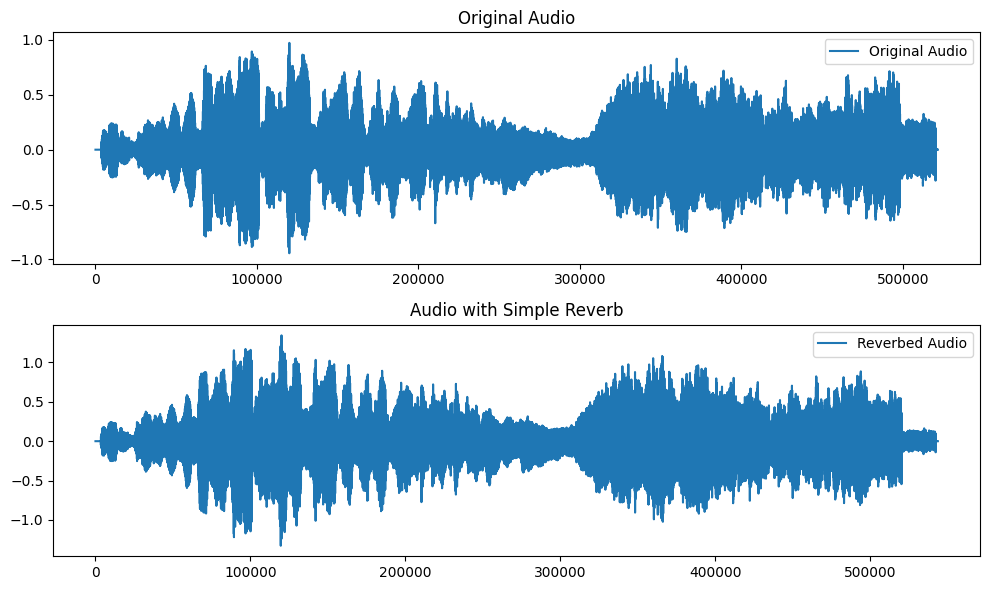

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import soundfile as sf

def simple_reverb(signal, sr, delay_ms, decay):
    """
    Apply a simple reverb effect to the signal
    :param signal: Input audio signal
    :param sr: Sampling rate
    :param delay_ms: Delay of the reverb in milliseconds
    :param decay: Decay factor of the reverb tail
    :return: Signal with reverb applied
    """
    delay_samples = int(sr * delay_ms / 1000)
    output = np.zeros(len(signal) + delay_samples)
    output[:len(signal)] = signal

    # Apply reverb effect
    for i in range(len(signal)):
        output[i + delay_samples] += signal[i] * decay

    return output

# Load an audio file
audio, sr = librosa.load('/content/reverbed_audio.mp3', sr=None)

# Apply simple reverb
reverbed_audio = simple_reverb(audio, sr, delay_ms=500, decay=0.5)

# Plot the original and reverbed audio
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(audio, label='Original Audio')
plt.title('Original Audio')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(reverbed_audio, label='Reverbed Audio')
plt.title('Audio with Simple Reverb')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import librosa
import numpy as np
import soundfile as sf
from pydub import AudioSegment

def simple_reverb(signal, sr, delay_ms, decay):
    delay_samples = int(sr * delay_ms / 1000)
    output = np.zeros(len(signal) + delay_samples)
    output[:len(signal)] = signal

    # Apply reverb effect
    for i in range(len(signal)):
        output[i + delay_samples] += signal[i] * decay

    return output

# Load an audio file
audio, sr = librosa.load('/content/original.mpeg', sr=None)

# Apply simple reverb
reverbed_audio = simple_reverb(audio, sr, delay_ms=500, decay=0.5)

# Convert the float audio array to int16 format
audio_int16 = np.int16(reverbed_audio / np.max(np.abs(reverbed_audio)) * 32767)

# Create a pydub audio segment
audio_segment = AudioSegment(
    data=audio_int16.tobytes(),
    sample_width=2,  # Corresponds to audio_int16
    frame_rate=sr,
    channels=1  # or 2 for stereo
)

# Export the audio segment to an MP3 file
output_path = '/content/reverbed_audio.mpeg'
audio_segment.export(output_path, format='mpeg')


<_io.BufferedRandom name='/content/reverbed_audio.mpeg'>